# [Jupyter]Regression.ipynb
Description   : Regression using tensorflow 2

## 1. 공식을 통해 직접 구현한 회귀(Regression)
2018년 우리나라의 지역별 인구 증가율과 고령인구비율 데이터는 아래와 같다.

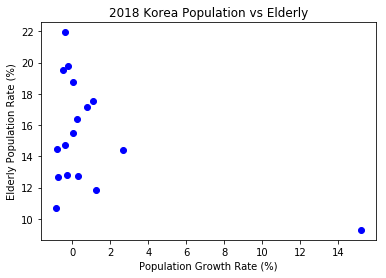

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 시각화
polpulation_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
polpulation_old = [12.77, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(polpulation_inc, polpulation_old, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a : -0.18203075467417948 , b : 15.710256767211042


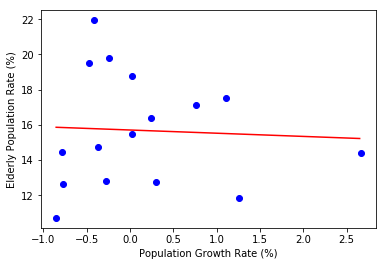

In [18]:
# 아웃라이어 제거
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# x, y에 대한 평균
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b 구하기
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a :', a, ', b :', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 2. 텐서플로우를 활용한 회귀(Regression)
### a. 1차 함수 회귀

a :  0.39932507 , b : 0.8439818
0 번째 a :  0.469325 , b : 0.9139818 , loss 226.26686
100 번째 a :  1.314162 , b : 7.2310433 , loss 79.88516
200 번째 a :  0.5386257 , b : 11.606462 , loss 26.110472
300 번째 a :  0.1046486 , b : 14.076312 , loss 12.2691
400 번째 a :  -0.0894501 , b : 15.182519 , loss 9.933519
500 번째 a :  -0.15789257 , b : 15.5726595 , loss 9.67999
600 번째 a :  -0.17697586 , b : 15.681442 , loss 9.66231
700 번째 a :  -0.18118797 , b : 15.705453 , loss 9.661521
800 번째 a :  -0.18192047 , b : 15.709628 , loss 9.661499
900 번째 a :  -0.18201953 , b : 15.710195 , loss 9.661499


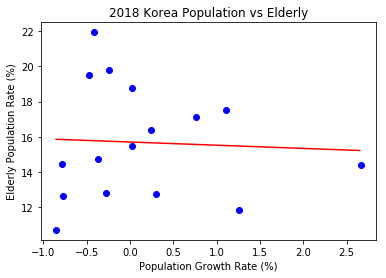

In [24]:
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X + b
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### b. 2차 함수 회귀

a :  0.8404221 , b : 0.27419218 , c : 0.8764753
0 번째 a :  0.9104221 , b : 0.344192 , c : 0.94647527 , loss 209.14258
100 번째 a :  3.440231 , b : -4.198287 , c : 6.9918346 , loss 70.02995
200 번째 a :  1.8150338 , b : -2.4556751 , c : 11.117734 , loss 27.836021
300 번째 a :  0.45240766 , b : -0.6537413 , c : 13.77586 , loss 13.288876
400 번째 a :  -0.27802527 , b : 0.30814373 , c : 15.212571 , loss 9.730019
500 번째 a :  -0.6037196 , b : 0.73665595 , c : 15.854285 , loss 9.114367
600 번째 a :  -0.72465515 , b : 0.89575195 , c : 16.092615 , loss 9.038818
700 번째 a :  -0.76215315 , b : 0.9450805 , c : 16.166515 , loss 9.032233
800 번째 a :  -0.7718521 , b : 0.957839 , c : 16.185633 , loss 9.03183
900 번째 a :  -0.77393883 , b : 0.9605851 , c : 16.189745 , loss 9.031811


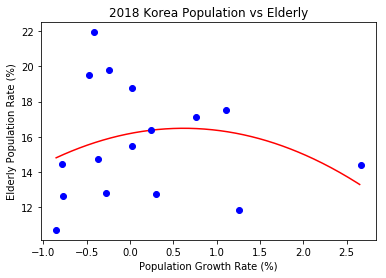

In [25]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X * X + b * X + c
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b, c])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### c. 3차 함수 회귀

a :  0.46851733 , b : 0.6571547 , c : 0.8789788 , d : 0.4719363
0 번째 a :  0.39851743 , b : 0.7271547 , c : 0.80897886 , d : 0.5419363 , loss 219.34764
100 번째 a :  -1.6631974 , b : 6.248816 , c : -1.6316367 , d : 6.6090107 , loss 64.16796
200 번째 a :  -2.4534335 , b : 7.2817545 , c : -0.4359137 , d : 10.259515 , loss 30.397276
300 번째 a :  -1.8853306 , b : 5.310932 , c : -0.052719176 , d : 12.359318 , loss 20.022835
400 번째 a :  -1.0132906 , b : 2.7371557 , c : 0.08887464 , d : 13.818243 , loss 13.970627
500 번째 a :  -0.24375205 , b : 0.507204 , c : 0.17332585 , d : 14.943207 , loss 10.490772
600 번째 a :  0.34888357 , b : -1.2055635 , c : 0.23396716 , d : 15.7913885 , loss 8.707996
700 번째 a :  0.7732015 , b : -2.4312124 , c : 0.27675924 , d : 16.395962 , loss 7.892712
800 번째 a :  1.0585746 , b : -3.2553647 , c : 0.30539864 , d : 16.80194 , loss 7.5592723
900 번째 a :  1.239255 , b : -3.7771358 , c : 0.32349992 , d : 17.058842 , loss 7.437291


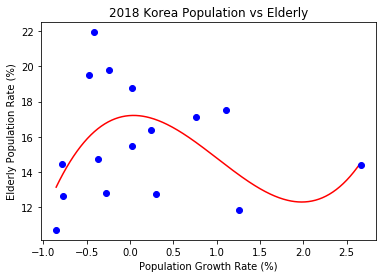

In [27]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

print("a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", d :", d.numpy())

# 잔차의 제곱의 평균을 구하는 과정
def compute_loss():
    y_p = a * X * X * X + b * X * X + c * X + d
    loss = tf.reduce_mean((Y - y_p) ** 2)
    return loss

# optimizer 설정, Adam을 활용, 학습률 0.07 설정
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

# 학습 단계
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화 시켜주기 위한 과정
    optimizer.minimize(compute_loss, var_list = [a, b, c, d])

    # record 설정
    if i % 100 == 0:
        print(i, "번째 a : ", a.numpy(), ", b :", b.numpy(), ", c :", c.numpy(), ", d :", d.numpy(), ", loss", compute_loss().numpy())

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 3. 딥러닝 네트워크를 활용한 회귀(Regression)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 0s 302ms/step - loss: 254.3958
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 88.6668
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 11.3731
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 9.5524
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.2808
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 9.2035
Epoch 7/10
1/1 [==============================] - 0s

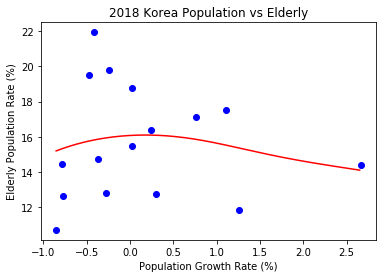

In [32]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, 0.76, 2.66]
Y = [12.77, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units = 1)]
)

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss = 'mse')
model.summary()

model.fit(X, Y, epochs=10) # 10회 학습시킨다.
model.predict(X)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

# 시각화
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.title('2018 Korea Population vs Elderly')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()